# Importing the libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading dataset


In [2]:
df = pd.read_csv(r'C:\Users\laptop\Desktop\InternShip\Fraud.csv')

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# Data cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
df.shape

(6362620, 11)

In [6]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [7]:
# checking for missing values

df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [8]:
# there is no missing values present in our dataset

In [9]:
# checking values of few columns

In [10]:
df['step'].value_counts()

step
19     51352
18     49579
187    49083
235    47491
307    46968
       ...  
432        4
706        4
693        4
112        2
662        2
Name: count, Length: 743, dtype: int64

In [11]:
df['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

In [12]:
df['nameOrig'].value_counts()

nameOrig
C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
              ..
C98968405      1
C720209255     1
C1567523029    1
C644777639     1
C1280323807    1
Name: count, Length: 6353307, dtype: int64

In [13]:
df['nameDest'].value_counts()

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
M1470027725      1
M1330329251      1
M1784358659      1
M2081431099      1
C2080388513      1
Name: count, Length: 2722362, dtype: int64

In [14]:
df['isFlaggedFraud'].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [15]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

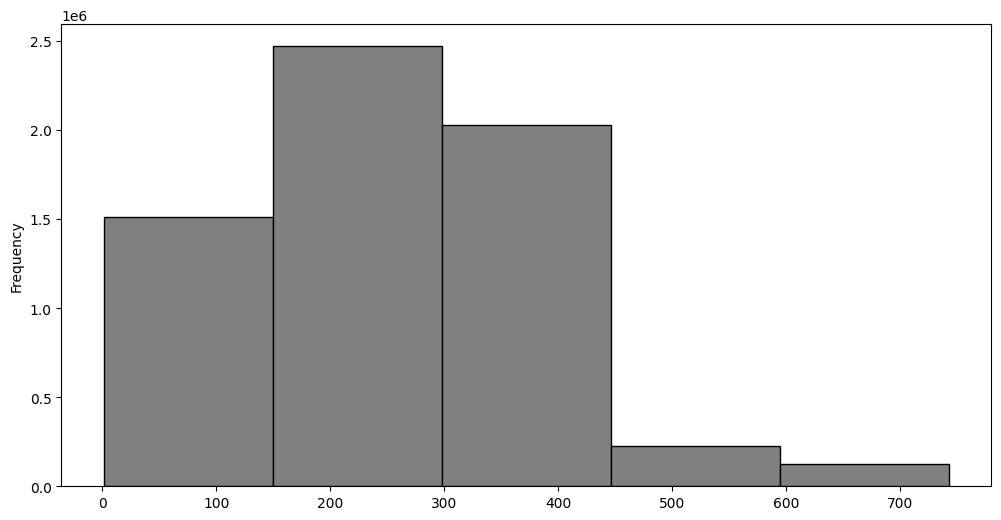

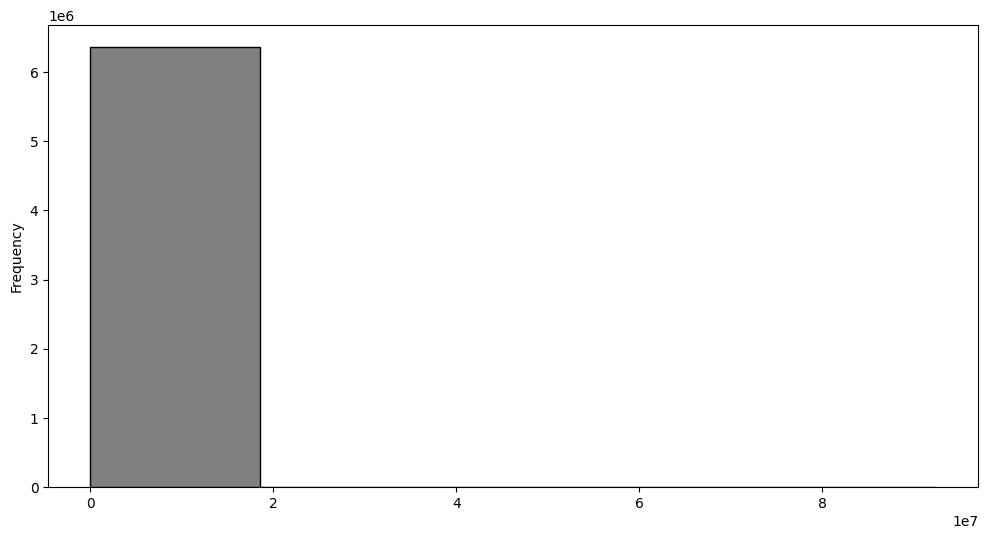

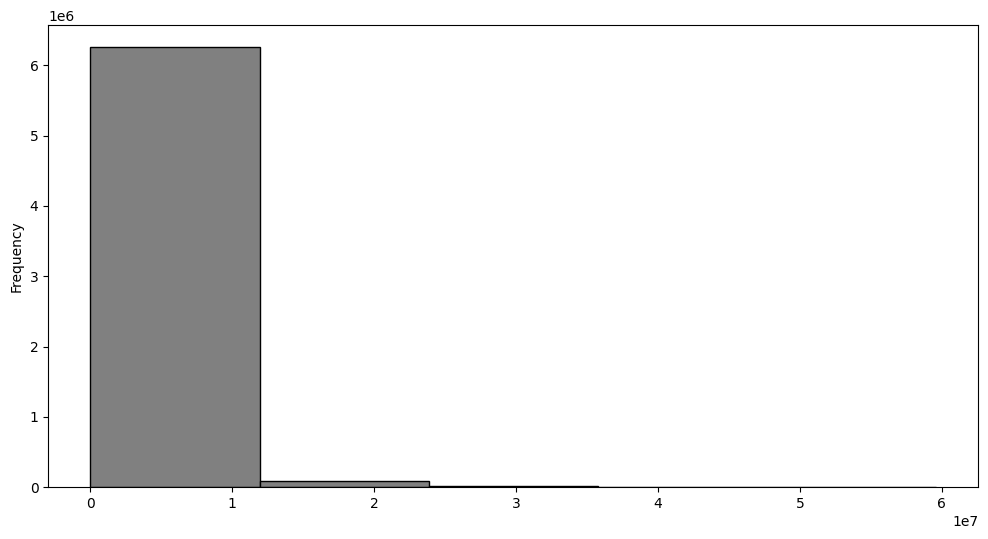

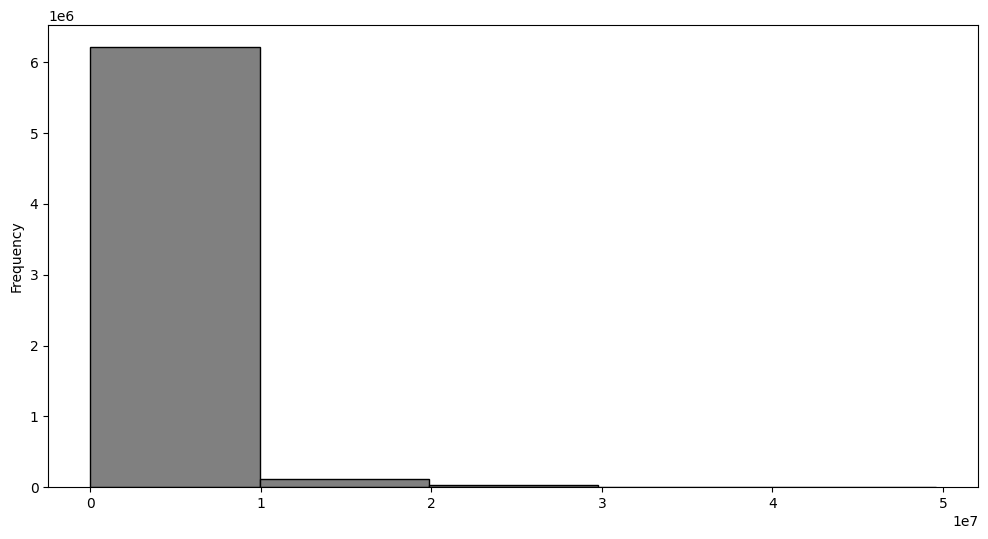

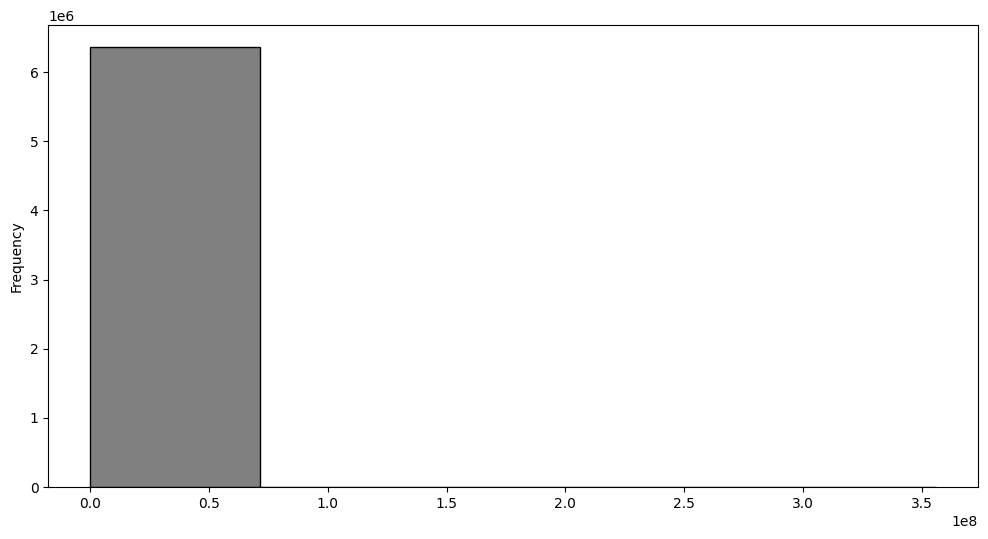

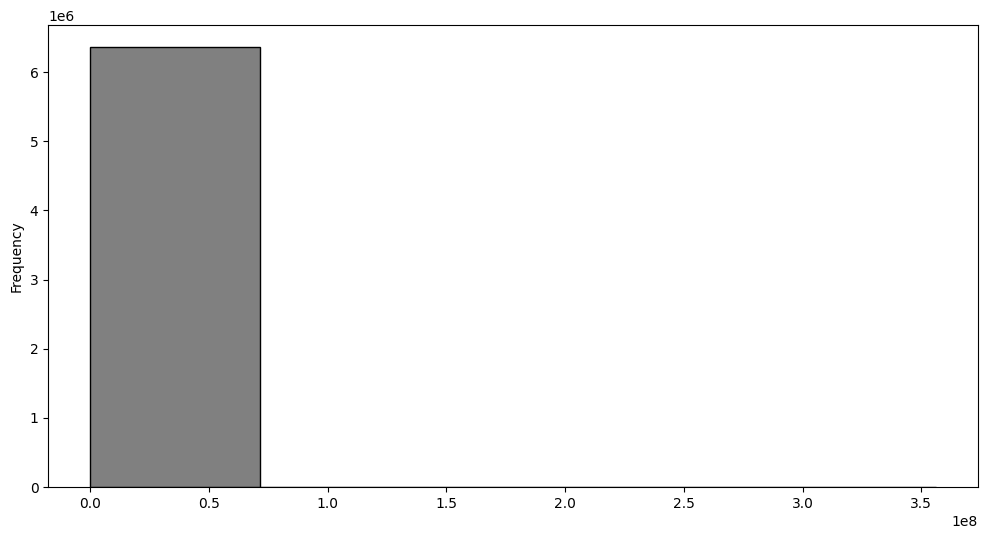

In [16]:
feature=['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for i in feature:
    df[i].plot(kind='hist', bins=5, figsize=(12,6), facecolor='grey',edgecolor='black')
    plt.show()

In [17]:
# looking at the plot we can see outliers ,we will remove them by usin quantile based capping and flooring

In [18]:
for i in feature:
    print(i)
    print(df[i].quantile(0.10))
    print(df[i].quantile(0.90))
    print('\n')

step
35.0
399.0


amount
4501.3
365423.30900000007


oldbalanceOrg
0.0
1822508.289000007


newbalanceOrig
0.0
1970344.7930000005


oldbalanceDest
0.0
2914266.6690000016


newbalanceDest
0.0
3194869.671000002




In [19]:
feature=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for i in feature:
    lower = df[i].quantile(0.10)
    upper = df[i].quantile(0.90)
    df[i] = np.where(df[i] <lower, lower,df[i])
    df[i] = np.where(df[i] >upper, upper,df[i])
    print('Feature: ',i)
    print('Skewness value: ',df[i].skew())
    print('\n')

Feature:  amount
Skewness value:  0.8046460444556197


Feature:  oldbalanceOrg
Skewness value:  2.249361299814406


Feature:  newbalanceOrig
Skewness value:  2.2262847493216786


Feature:  oldbalanceDest
Skewness value:  1.4173123924260833


Feature:  newbalanceDest
Skewness value:  1.3593024983493058




In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [21]:
# apply label encoder on type column

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['type'] = le.fit_transform(df['type'])

In [22]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,3,4501.30,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,4,4501.30,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,1,4501.30,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,3,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int32  
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int32(1), int64(3), object(2)
memory usage: 509.7+ MB


In [24]:
# Checking for multi-collinearity, we can use the correlation matrix

In [25]:
corrMatrix = df.corr(numeric_only=True)
corrMatrix

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.006635,-0.007307,-0.006460,-0.006468,0.002949,-0.004029,0.031578,0.003277
type,0.006635,1.000000,-0.245341,-0.452519,-0.494704,-0.268633,-0.194577,0.020833,0.002685
amount,-0.007307,-0.245341,1.000000,0.090592,0.105925,0.405745,0.479862,0.039620,0.003092
oldbalanceOrg,-0.006460,-0.452519,0.090592,1.000000,0.988006,0.191574,0.115405,0.030947,0.003841
newbalanceOrig,-0.006468,-0.494704,0.105925,0.988006,1.000000,0.195563,0.108278,-0.014391,0.003795
oldbalanceDest,0.002949,-0.268633,0.405745,0.191574,0.195563,1.000000,0.970051,-0.012913,-0.001079
newbalanceDest,-0.004029,-0.194577,0.479862,0.115405,0.108278,0.970051,1.000000,-0.000797,-0.001130
isFraud,0.031578,0.020833,0.039620,0.030947,-0.014391,-0.012913,-0.000797,1.000000,0.044109
isFlaggedFraud,0.003277,0.002685,0.003092,0.003841,0.003795,-0.001079,-0.001130,0.044109,1.000000


In [26]:
# creating dependant and independent variable

X = np.array(df[["type", "amount", "oldbalanceOrg", "newbalanceOrig"]])
y = np.array(df[["isFraud"]])

In [27]:
X

array([[3.00000000e+00, 9.83964000e+03, 1.70136000e+05, 1.60296360e+05],
       [3.00000000e+00, 4.50130000e+03, 2.12490000e+04, 1.93847200e+04],
       [4.00000000e+00, 4.50130000e+03, 1.81000000e+02, 0.00000000e+00],
       ...,
       [1.00000000e+00, 3.65423309e+05, 1.82250829e+06, 0.00000000e+00],
       [4.00000000e+00, 3.65423309e+05, 8.50002520e+05, 0.00000000e+00],
       [1.00000000e+00, 3.65423309e+05, 8.50002520e+05, 0.00000000e+00]])

In [28]:
y

array([[0],
       [0],
       [1],
       ...,
       [1],
       [1],
       [1]], dtype=int64)

In [29]:
# Splitting the dataset into a training set and testing set

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [30]:
X_train

array([[0.00000000e+00, 3.65423309e+05, 1.82250829e+06, 1.97034479e+06],
       [0.00000000e+00, 2.12458780e+05, 2.34635000e+05, 4.47093780e+05],
       [3.00000000e+00, 1.99676000e+04, 3.63400000e+03, 0.00000000e+00],
       ...,
       [1.00000000e+00, 1.05791600e+04, 5.92790000e+04, 4.86998400e+04],
       [1.00000000e+00, 7.30207600e+04, 2.02890000e+04, 0.00000000e+00],
       [1.00000000e+00, 8.96988500e+04, 1.96071000e+05, 1.06372150e+05]])

In [31]:
y_train

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [32]:
X_test

array([[0.0000000e+00, 3.3021842e+05, 2.0866000e+04, 3.5108442e+05],
       [3.0000000e+00, 1.1647080e+04, 3.0370000e+04, 1.8722920e+04],
       [0.0000000e+00, 1.5226421e+05, 1.0658900e+05, 2.5885321e+05],
       ...,
       [1.0000000e+00, 2.4851167e+05, 5.0700000e+02, 0.0000000e+00],
       [1.0000000e+00, 2.0000865e+05, 0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 4.8066500e+04, 2.0220700e+05, 2.5027350e+05]])

In [33]:
y_test

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [34]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy', random_state=0)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

In [35]:
y_pred = dt.predict(X_test)

In [36]:
from sklearn.metrics import confusion_matrix,accuracy_score

print('Confusion_matrix -->\n',confusion_matrix(y_test,y_pred))
print('Accuracy score-->',accuracy_score(y_test,y_pred))

Confusion_matrix -->
 [[1270526     378]
 [    404    1216]]
Accuracy score--> 0.9993854732798753
